# Naive Bayes

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [3]:
X_train = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/X_train.csv')
y_train = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/y_train.csv')
X_test = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/X_test.csv')
y_test = pd.read_csv('/Users/apple/5243AppliedDS/Modeling-Earthquake-Damage-main/Resources/Datasets/y_test.csv')
y_train = y_train['damage_grade']
y_test = y_test['damage_grade']

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# keep the columns name for data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0.627305,0.884794,0.566307,-0.080726,1.197536,-0.088956,-0.458306,0.297285,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
1,-0.795012,-1.356591,1.279024,-1.415839,-0.178044,-0.088956,-0.458306,-0.226390,3.207508,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
2,0.543469,0.884794,1.254782,-0.975192,1.197536,0.251137,-0.458306,-0.226390,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,-5.081102,9.780223
3,1.246137,0.760273,-1.317303,-1.044609,-0.178044,-0.224993,-0.231009,-0.226390,-0.311769,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
4,1.532315,-0.609463,-0.076108,-0.077434,-0.178044,-0.361031,0.223585,0.297285,-0.311769,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208475,0.966497,-0.733984,1.169935,-1.489646,-1.553624,-0.224993,-0.458306,-0.226390,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
208476,1.116194,-1.232070,-1.351242,-0.139443,-0.178044,-0.361031,-0.003712,-0.750064,-0.311769,0.558159,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
208477,-0.530871,1.631923,-0.371862,-1.410352,1.197536,-0.088956,2.496554,0.820959,3.207508,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247
208478,-0.403948,0.386709,0.796607,-1.551106,-0.178044,-0.156975,-0.003712,1.344633,-0.311769,-1.791604,...,-0.013323,-0.011381,-0.025171,-0.149723,-0.037129,-0.119185,-0.147242,-0.075864,0.196808,-0.102247


In [15]:
pca = PCA(n_components=0.40)  # Adjust n_components
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)
X_train_pca = X_train_scaled
X_test_pca = X_test_scaled
# print the number of components
# print(pca.n_components_)
# # I want to know which components are left
# print(pca.explained_variance_ratio_)



In [11]:
# Create a GaussianNB object
gnb = GaussianNB()

# Define a range of var_smoothing values to test
params = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Set up the grid search to test each parameter
grid_search = GridSearchCV(estimator=gnb, param_grid=params, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# Print the best parameter and the score for the full training set
print("Best Parameter: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameter:  {'var_smoothing': 0.1}
Best Score:  0.4274750575594782


In [20]:
model = GaussianNB(var_smoothing=1e-1)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))
print("Precision Score (Weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score (Weighted):", recall_score(y_test, y_pred, average='weighted'))

y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted'))


              precision    recall  f1-score   support

           1       0.38      0.50      0.44      5025
           2       0.66      0.14      0.23     29652
           3       0.40      0.90      0.55     17444

    accuracy                           0.43     52121
   macro avg       0.48      0.51      0.41     52121
weighted avg       0.55      0.43      0.36     52121

[[ 2526   956  1543]
 [ 3430  4117 22105]
 [  627  1160 15657]]
Accuracy Score: 0.4278505784616565
F1 Score (Weighted): 0.35717543049291917
Precision Score (Weighted): 0.5460862549398997
Recall Score (Weighted): 0.4278505784616565
ROC AUC Score: 0.4998858811320756


In [48]:
result_df = pd.read_csv('../Resources/Datasets/results.csv', index_col=0)
result_df.loc['Naive Bayes'] = [accuracy_score(y_test, y_pred), 
                                   precision_score(y_test, y_pred, average='weighted'), 
                                   recall_score(y_test, y_pred, average='weighted'), 
                                   f1_score(y_test, y_pred, average='weighted'), 
                                   roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted'), 
                                   average_precision_score(y_test, y_pred_proba, average='weighted')]
result_df

,accuracy,precision,recall,weighted_f1_score,AUC,AP
Model,,,,,,
Decision Tree,0.685309,0.681945,0.685309,0.676803,0.495695,0.442694
Random Forest,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XGB,0.735078,0.736393,0.735078,0.727481,0.834599,0.790500
SVM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Logistic Regression,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Logistic Regression,0.591988,0.580377,0.591988,0.539761,0.661276,0.586349
Neural Network,0.656300,0.655297,0.656300,0.638502,0.735512,0.669619
Naive Bayes,0.427851,0.546086,0.427851,0.357175,0.499886,0.444937


In [49]:
result_df.to_csv('../Resources/Datasets/results.csv')

In [31]:
# save the model using pickle
import pickle
filename = '../Models/naive_bayes_model.pkl'
pickle.dump(model, open(filename, 'wb'))

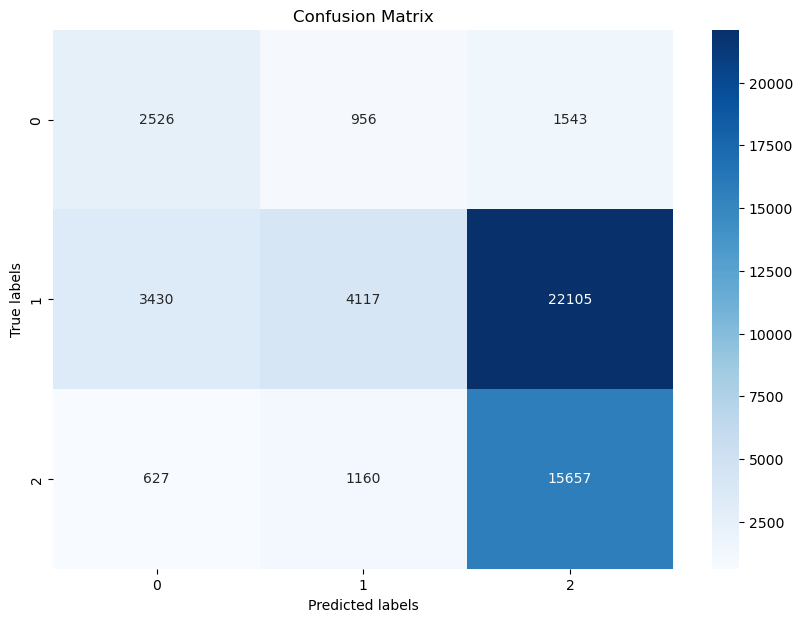

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))
# get the roc curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

ROC AUC Score: 0.49966387882152086


{0: 0.49906257315427277, 1: 0.5, 2: 0.49992906331028963}

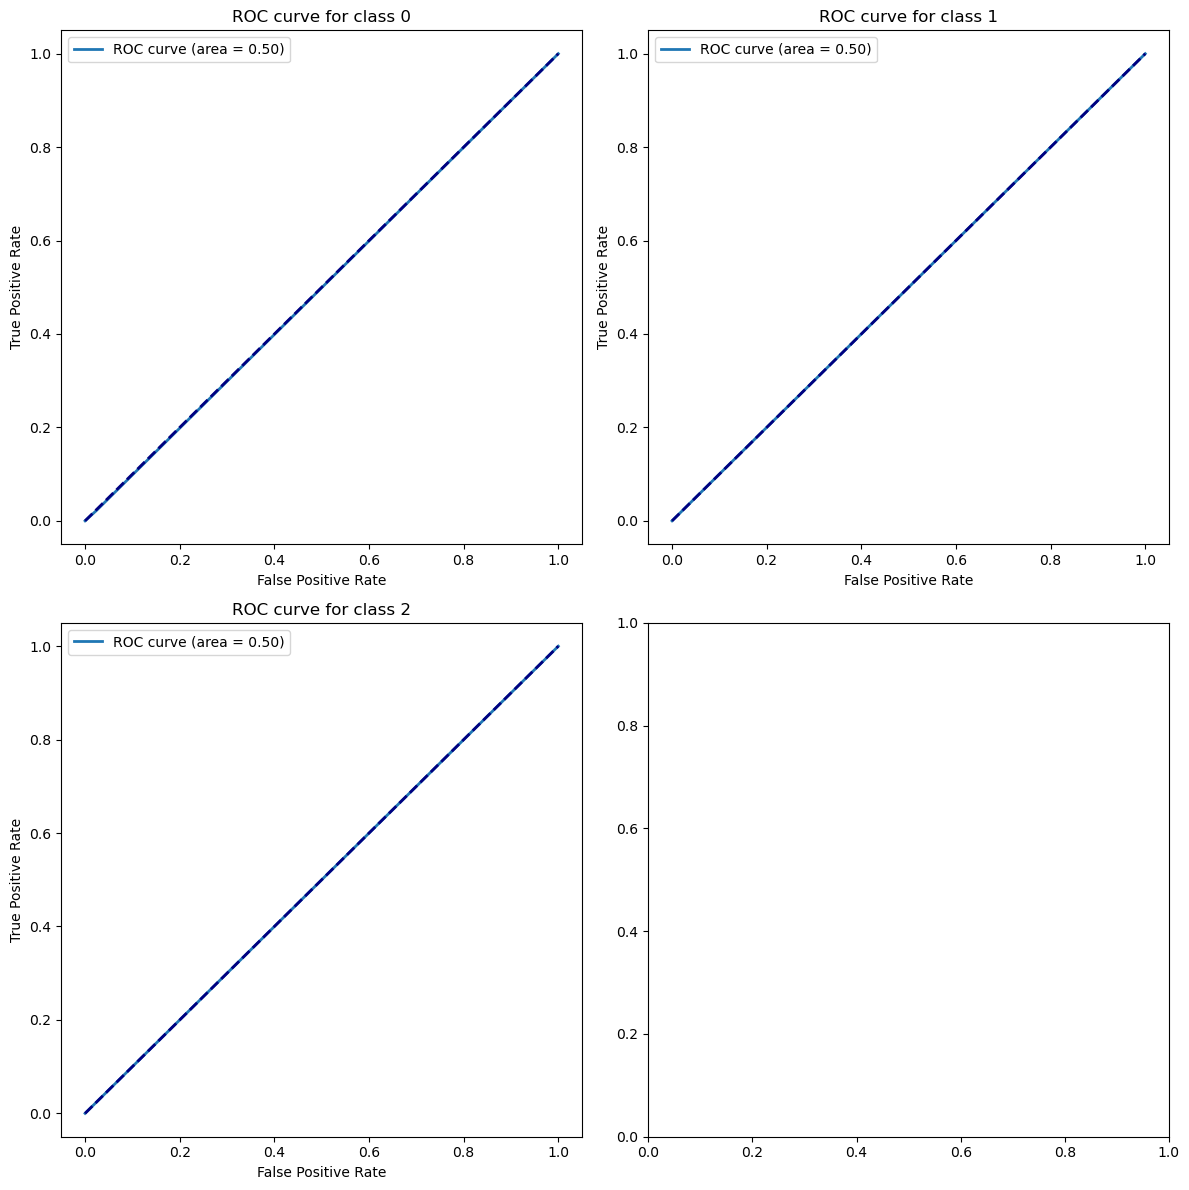

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Creates a 2x2 grid of Axes objects
axs = axs.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
for i in range(3):
    axs[i].plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_title('ROC curve for class {}'.format(i))
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].legend(loc='best')

plt.tight_layout()
plt.show()


### Train Model after Data Preprocessing

In [25]:
# Load the datasets
X_train = pd.read_csv('/Users/apple/Desktop/drive-download-20240305T032759Z-001/X_train_processed.csv', header = None)
y_train = pd.read_csv('/Users/apple/Desktop/drive-download-20240305T032759Z-001/y_train_processed.csv')
X_test = pd.read_csv('/Users/apple/Desktop/drive-download-20240305T032759Z-001/X_test_processed.csv', header = None)
y_test = pd.read_csv('/Users/apple/Desktop/drive-download-20240305T032759Z-001/y_test_processed.csv')

X_train.head(), y_train.head(), X_test.head(), y_test.head()

if isinstance(y_train, pd.DataFrame):
    y_train = y_train['damage_grade']
if isinstance(y_test, pd.DataFrame):
    y_test = y_test['damage_grade']

y_train = y_train.squeeze()
y_test = y_test.squeeze()
y_train

0         3
1         3
2         2
3         2
4         2
         ..
208475    2
208476    2
208477    3
208478    3
208479    2
Name: damage_grade, Length: 208480, dtype: int64

In [26]:
# Create a GaussianNB object
gnb = GaussianNB()

# Define a range of var_smoothing values to test
params = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Set up the grid search to test each parameter
grid_search = GridSearchCV(estimator=gnb, param_grid=params, cv=50)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameter and the score for the full training set
print("Best Parameter: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameter:  {'var_smoothing': 0.1}
Best Score:  0.5616605112647708


In [27]:
model = GaussianNB(var_smoothing=1e-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))
print("Precision Score (Weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score (Weighted):", recall_score(y_test, y_pred, average='weighted'))

y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted'))


              precision    recall  f1-score   support

           1       0.46      0.36      0.41      5025
           2       0.61      0.70      0.65     29652
           3       0.48      0.38      0.42     17444

    accuracy                           0.56     52121
   macro avg       0.52      0.48      0.49     52121
weighted avg       0.55      0.56      0.55     52121

[[ 1832  2742   451]
 [ 1901 20891  6860]
 [  277 10506  6661]]
Accuracy Score: 0.5637650850904625
F1 Score (Weighted): 0.5536445613559806
Precision Score (Weighted): 0.5517387809927626
Recall Score (Weighted): 0.5637650850904625
ROC AUC Score: 0.6282713668514442


In [40]:
result_df = pd.read_csv('../Resources/Datasets/results.csv', index_col=0)

result_df.loc['Naive Bayes'] = [accuracy_score(y_test, y_pred), 
                                   precision_score(y_test, y_pred, average='weighted'), 
                                   recall_score(y_test, y_pred, average='weighted'), 
                                   f1_score(y_test, y_pred, average='weighted'), 
                                   roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted'), 
                                   average_precision_score(y_test, y_pred_proba, average='weighted')]

result_df

,accuracy,precision,recall,weighted_f1_score,AUC,AP
Model,,,,,,
Decision Tree,0.685309,0.681945,0.685309,0.676803,0.495695,0.442694
Random Forest,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XGB,0.735078,0.736393,0.735078,0.727481,0.834599,0.790500
SVM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Logistic Regression,0.591988,0.580377,0.591988,0.539761,0.661276,0.586349
Neural Network,0.656300,0.655297,0.656300,0.638502,0.735512,0.669619
Naive Bayes,0.563765,0.551739,0.563765,0.553645,0.628271,0.545745
Preprocessed + XGB,0.666161,0.666032,0.666161,0.648679,0.756515,0.697251


In [41]:
result_df.to_csv('../Resources/Datasets/results.csv')

In [35]:
# save the model using pickle
import pickle
filename = '../Models/naive_bayes_model.pkl'
pickle.dump(model, open(filename, 'wb'))

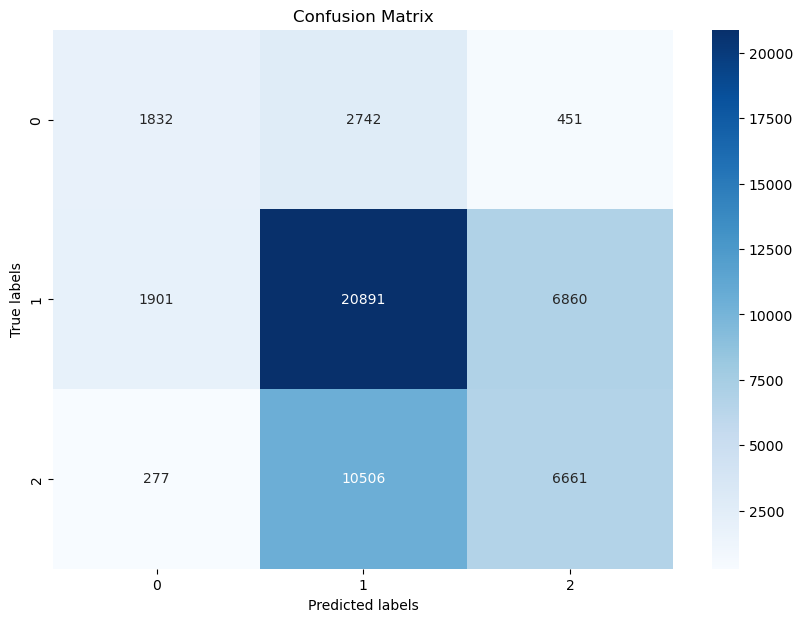

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))
# get the roc curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

ROC AUC Score: 0.6835168373043179


{0: 0.8133772808287424, 1: 0.5797559987276143, 2: 0.657417232356597}

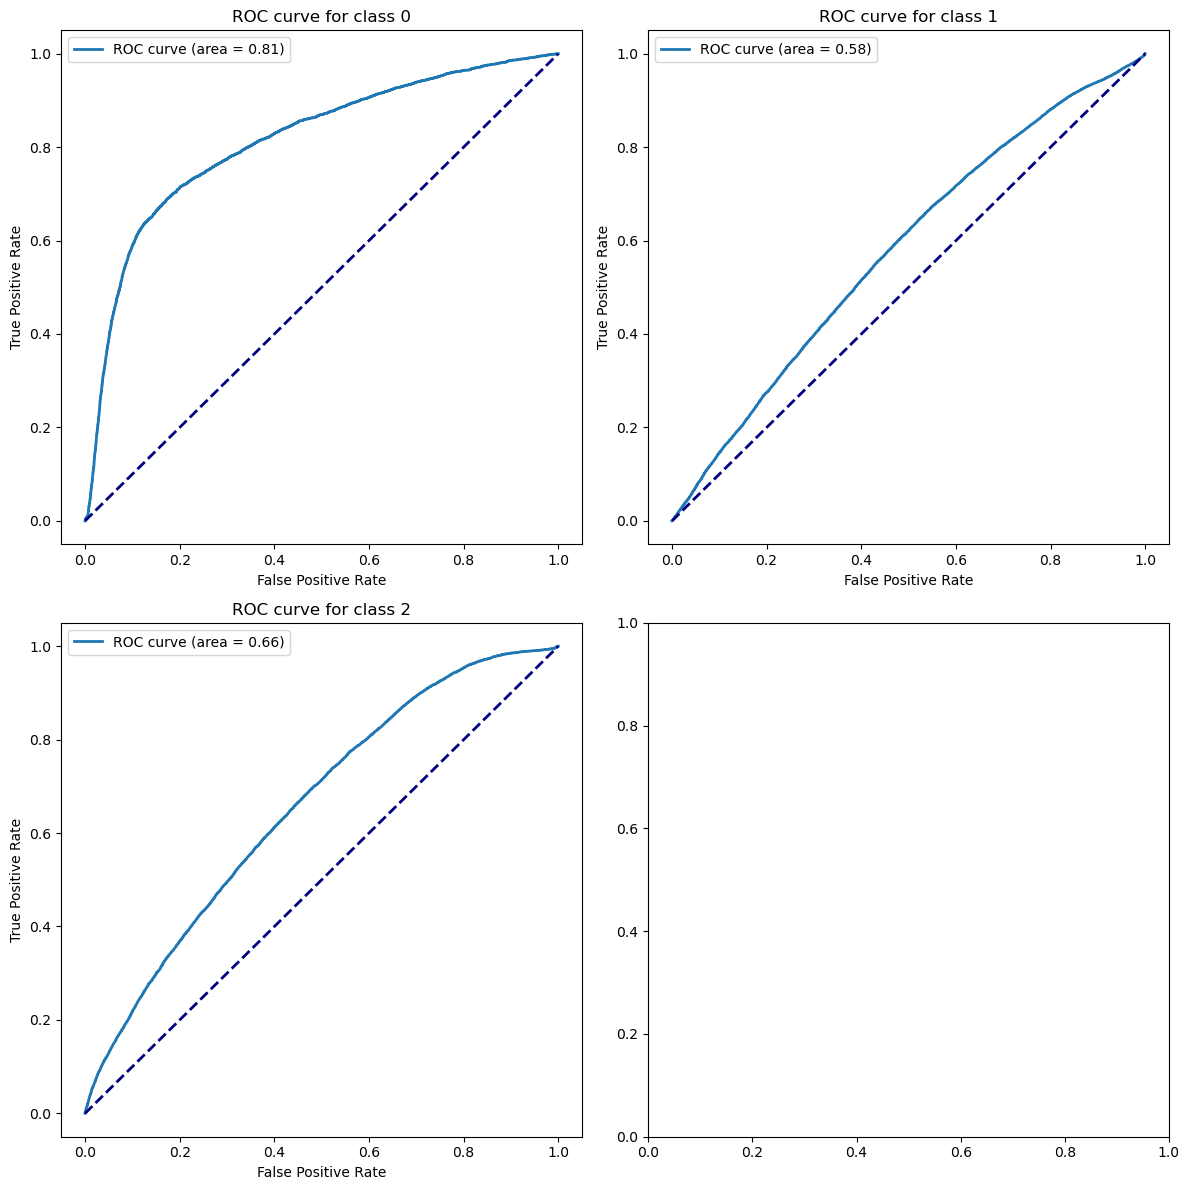

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Creates a 2x2 grid of Axes objects
axs = axs.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
for i in range(3):
    axs[i].plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_title('ROC curve for class {}'.format(i))
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].legend(loc='best')

plt.tight_layout()
plt.show()
